In [1]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

In [2]:
df=pd.read_csv('D:\Google Drive\imarticus python\yhills\H1N1_Flu_Vaccines.csv')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
df.drop('respondent_id',axis=1,inplace=True)

In [6]:
df.skew()

C:\Users\samee\AppData\Local\Temp\ipykernel_3192\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


h1n1_concern                  -0.159913
h1n1_knowledge                -0.239224
behavioral_antiviral_meds      4.186503
behavioral_avoidance          -1.011306
behavioral_face_mask           3.401744
behavioral_wash_hands         -1.716380
behavioral_large_gatherings    0.589522
behavioral_outside_home        0.688227
behavioral_touch_face         -0.758355
doctor_recc_h1n1               1.349742
doctor_recc_seasonal           0.724397
chronic_med_condition          0.962097
child_under_6_months           3.033008
health_worker                  2.462087
health_insurance              -2.334909
opinion_h1n1_vacc_effective   -0.902706
opinion_h1n1_risk              0.672957
opinion_h1n1_sick_from_vacc    0.651281
opinion_seas_vacc_effective   -1.315177
opinion_seas_risk              0.250923
opinion_seas_sick_from_vacc    0.919587
household_adults               0.786572
household_children             1.543903
h1n1_vaccine                   1.406022
seasonal_vaccine               0.137901


## FILLING THE MISSING VALUES

In [7]:
mean_value=df['h1n1_concern'].mean()
df['h1n1_concern'].fillna(value=mean_value,inplace=True)

In [8]:
mean_value=df['h1n1_knowledge'].mean()
df['h1n1_knowledge'].fillna(value=mean_value,inplace=True)

In [9]:
median_value=df['behavioral_antiviral_meds'].median()
df['behavioral_antiviral_meds'].fillna(value=median_value,inplace=True)

In [10]:
median_value=df['behavioral_avoidance'].median()
df['behavioral_avoidance'].fillna(value=median_value,inplace=True)

In [11]:

median_value=df['behavioral_face_mask'].median()
df['behavioral_face_mask'].fillna(value=median_value,inplace=True)

In [12]:
median_value=df['behavioral_wash_hands'].median()
df['behavioral_wash_hands'].fillna(value=median_value,inplace=True)

In [13]:
mean_value=df['behavioral_large_gatherings'].mean()
df['behavioral_large_gatherings'].fillna(value=mean_value,inplace=True)

In [14]:
mean_value=df['behavioral_outside_home'].mean()
df['behavioral_outside_home'].fillna(value=mean_value,inplace=True)

In [15]:
mean_value=df['behavioral_touch_face'].mean()
df['behavioral_touch_face'].fillna(value=mean_value,inplace=True)

In [16]:
mean_value=df['doctor_recc_seasonal'].mean()
df['doctor_recc_seasonal'].fillna(value=mean_value,inplace=True)

In [17]:
median_value=df['doctor_recc_h1n1'].median()
df['doctor_recc_h1n1'].fillna(value=median_value,inplace=True)

In [18]:
mean_value=df['chronic_med_condition'].mean()
df['chronic_med_condition'].fillna(value=mean_value,inplace=True)

In [19]:
median_value=df['child_under_6_months'].median()
df['child_under_6_months'].fillna(value=median_value,inplace=True)

In [20]:
median_value=df['health_worker'].median()
df['health_worker'].fillna(value=median_value,inplace=True)

In [21]:
median_value=df['health_insurance'].median()
df['health_insurance'].fillna(value=median_value,inplace=True)

In [22]:
mean_value=df['opinion_h1n1_vacc_effective'].mean()
df['opinion_h1n1_vacc_effective'].fillna(value=mean_value,inplace=True)

In [23]:
mean_value=df['opinion_h1n1_risk'].mean()
df['opinion_h1n1_risk'].fillna(value=mean_value,inplace=True)

In [24]:

mean_value=df['opinion_h1n1_sick_from_vacc'].mean()
df['opinion_h1n1_sick_from_vacc'].fillna(value=mean_value,inplace=True)

In [25]:
median_value=df['opinion_seas_vacc_effective'].median()
df['opinion_seas_vacc_effective'].fillna(value=median_value,inplace=True)

In [26]:
mean_value=df['opinion_seas_risk'].mean()
df['opinion_seas_risk'].fillna(value=mean_value,inplace=True)

In [27]:
mean_value=df['opinion_seas_sick_from_vacc'].mean()
df['opinion_seas_sick_from_vacc'].fillna(value=mean_value,inplace=True)

In [28]:
mean_value=df['household_adults'].mean()
df['household_adults'].fillna(value=mean_value,inplace=True)

In [29]:
mean_value=df['household_children'].mean()
df['household_children'].fillna(value=mean_value,inplace=True)

In [30]:
mean_value=df['h1n1_vaccine'].mean()
df['h1n1_vaccine'].fillna(value=mean_value,inplace=True)

In [31]:
mean_value=df['seasonal_vaccine'].mean()
df['seasonal_vaccine'].fillna(value=mean_value,inplace=True)

CATEGORICAL

In [32]:
mode_value=df['age_group'].mode()[0]
df['age_group'].fillna(value=mode_value,inplace=True)

In [33]:
mode_value=df['education'].mode()[0]
df['education'].fillna(value=mode_value,inplace=True)

In [34]:
mode_value=df['race'].mode()[0]
df['race'].fillna(value=mode_value,inplace=True)

In [35]:
mode_value=df['sex'].mode()[0]
df['sex'].fillna(value=mode_value,inplace=True)

In [36]:
mode_value=df['income_poverty'].mode()[0]
df['income_poverty'].fillna(value=mode_value,inplace=True)

In [37]:
mode_value=df['marital_status'].mode()[0]
df['marital_status'].fillna(value=mode_value,inplace=True)

In [38]:
mode_value=df['rent_or_own'].mode()[0]
df['rent_or_own'].fillna(value=mode_value,inplace=True)

In [39]:
mode_value=df['employment_status'].mode()[0]
df['employment_status'].fillna(value=mode_value,inplace=True)

In [40]:
mode_value=df['marital_status'].mode()[0]
df['marital_status'].fillna(value=mode_value,inplace=True)

In [41]:

mode_value=df['hhs_geo_region'].mode()[0]
df['hhs_geo_region'].fillna(value=mode_value,inplace=True)

In [42]:

mode_value=df['census_msa'].mode()[0]
df['census_msa'].fillna(value=mode_value,inplace=True)

In [43]:
mode_value=df['employment_industry'].mode()[0]
df['employment_industry'].fillna(value=mode_value,inplace=True)

In [44]:
mode_value = df['employment_occupation'].mode()[0]
df['employment_occupation'].fillna(mode_value, inplace=True)

In [45]:
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [46]:
df.shape

(26707, 37)

X AND Y

In [47]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2:]

In [48]:
x.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [49]:
y.head()

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


Checking for missing values in dataset


In [50]:
# df.isnull().sum()
x.isnull().sum()
# y.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

There are lots of missing value so we need to impute them.


FILLING THE MISSING VALUES

In [51]:
x.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

## Encoding the object


In [53]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
enc=LabelEncoder()

In [54]:
x.age_group = enc.fit_transform(x.age_group)
x.education = enc.fit_transform(x.education)
x.race=enc.fit_transform(x.race)
x.sex = enc.fit_transform(x.sex)
x.marital_status = enc.fit_transform(x.marital_status)
x.income_poverty = enc.fit_transform(x.income_poverty)
x.rent_or_own = enc.fit_transform(x.rent_or_own)
x.employment_status = enc.fit_transform(x.employment_status)
x.hhs_geo_region = enc.fit_transform(x.hhs_geo_region)
x.census_msa = enc.fit_transform(x.census_msa)
x.employment_industry = enc.fit_transform(x.employment_industry)
x.employment_occupation = enc.fit_transform(x.employment_occupation)

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [56]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## EXPLORATORY DATA ANALYSIS


In [57]:
x.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048714,0.727749,0.068933,0.825888,0.358640,0.337315,0.677264,0.202494,...,0.456959,0.439735,0.222002,0.491894,4.829745,0.833489,0.886499,0.534583,6.786311,16.338338
std,0.908741,0.616805,0.215273,0.445127,0.253345,0.379213,0.478828,0.472076,0.466410,0.401866,...,0.670920,0.496364,0.415600,0.598964,2.805984,0.823313,0.749901,0.923836,5.474133,6.765910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,10.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,4.000000,21.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,7.000000,2.000000,1.000000,1.000000,8.000000,21.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,9.000000,2.000000,3.000000,3.000000,20.000000,22.000000


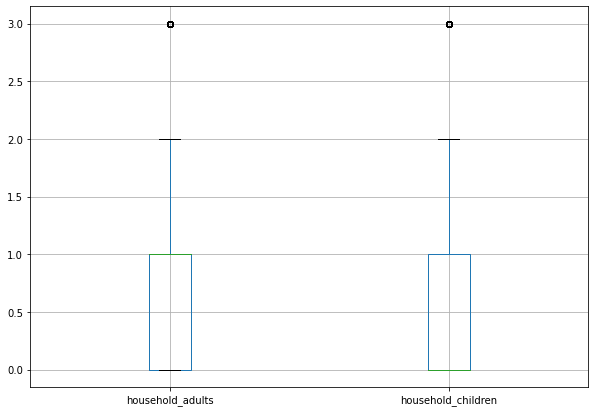

In [58]:
fig = plt.figure(figsize =(10, 7))

boxplot=df.boxplot(column=['household_adults','household_children'])
# sns.boxplot(df['household_children'])
# plt.show()


## OUTLIERS

In [59]:
def Outliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for i in column:
        if i>upper_limit or i<lower_limit:
            outliers.append(i)
    return np.array(outliers)

In [60]:
print(len(Outliers(x.household_adults)))
print(len(Outliers(x.household_children)))

1125
1747


In [61]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q1-1.5*IQR
    return lower_range,upper_range

In [62]:
low_adults,high_adults=remove_outlier(df['household_adults'])
df['household_adults']=np.where(df['household_adults']>high_adults,high_adults,df['household_adults'])
df['household_adults']=np.where(df['household_adults']<low_adults,low_adults,df['household_adults'])

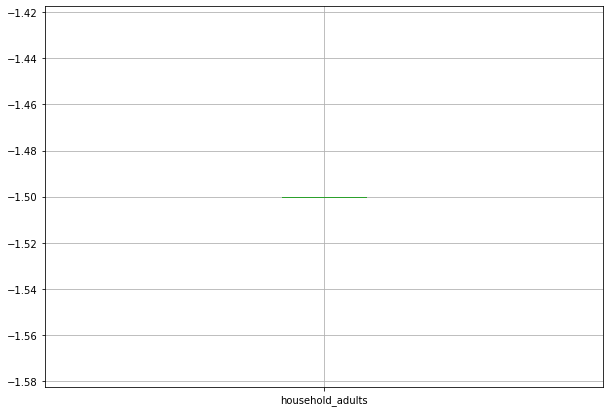

In [63]:
fig = plt.figure(figsize =(10, 7))

boxplot=df.boxplot(column=['household_adults'])

In [64]:
low_adults,high_adults=remove_outlier(df['household_children'])
df['household_children']=np.where(df['household_children']>high_adults,high_adults,df['household_children'])
df['household_children']=np.where(df['household_children']<low_adults,low_adults,df['household_children'])

In [65]:
low_adults,high_adults=remove_outlier(df['h1n1_concern'])
df['h1n1_concern']=np.where(df['h1n1_concern']>high_adults,high_adults,df['h1n1_concern'])
df['h1n1_concern']=np.where(df['h1n1_concern']<low_adults,low_adults,df['h1n1_concern'])

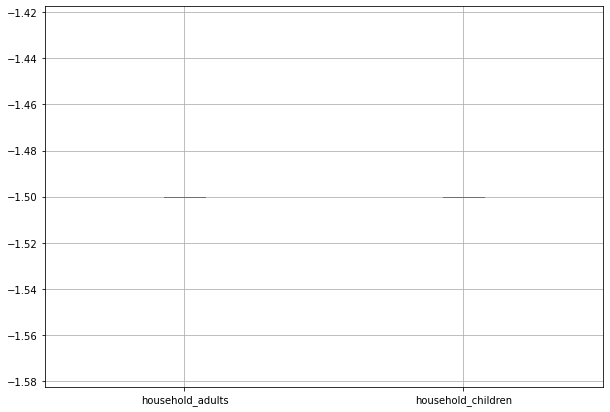

In [66]:
fig= plt.figure(figsize =(10, 7))

boxplot=df.boxplot(column=['household_adults','household_children'])

VISUALIZING

In [67]:
x.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2,1,0,1,8,2,0.0,0.0,4,21
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2,1,1,0,1,0,0.0,0.0,12,19
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,9,0,2.0,0.0,14,21
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2,1,1,1,5,1,0.0,0.0,4,21
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,9,0,1.0,0.0,18,5


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


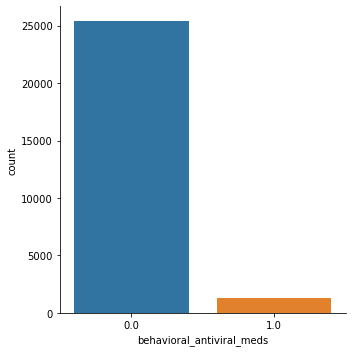

In [68]:
sns.factorplot('behavioral_antiviral_meds', data = x, kind = "count")

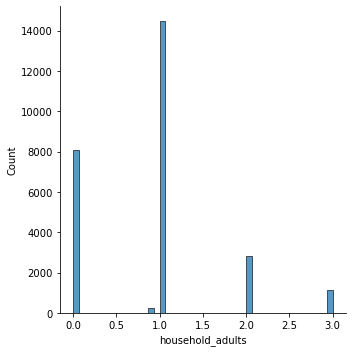

In [69]:
sns.displot(x.household_adults)

## MODEL

In [70]:
# ! pip install scikit-multilearn

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report
from skmultilearn.problem_transform import BinaryRelevance

In [72]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=23)

In [73]:
#Decision tree
model_CC_DT = ClassifierChain(DecisionTreeClassifier())
model_CC_DT.fit(xtrain,ytrain)
y_pred_CC_DT=model_CC_DT.predict(xtest)
CC_DT=accuracy_score(ytest,y_pred_CC_DT)
CC_DT

0.5429926369649319

In [74]:
#Logistic regression
model_CC_LT=ClassifierChain(LogisticRegression())
model_CC_LT.fit(xtrain,ytrain)
y_pred_CC_LT=model_CC_LT.predict(xtest)
CC_LT=accuracy_score(ytest,y_pred_CC_LT)
CC_LT

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.6722825408710845